In [ ]:
#Image Pre-processing (Noise reduction, image enhancement)
import cv2
import glob

testnormal=glob.glob(r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\test\NORMAL\*.jpg')
testbronchitis=glob.glob(r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\test\BRONCHITIS\*.jpg')
trainnormal=glob.glob(r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\train\NORMAL\*.jpg')
trainbronchitis=glob.glob(r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\train\BRONCHITIS\*.jpg')

#Image enhancement,
for file in testnormal:
    img = cv2.imread(file)
    #resize image
    res=cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    # Remove noise using a median filter
    dst= cv2.medianBlur(res, 11)
    # define the alpha and beta
    alpha = 1.0 # Contrast control
    beta = 5 # Brightness control
    # call convertScaleAbs function
    adjusted = cv2.convertScaleAbs(res, alpha=alpha, beta=beta)
    
for file in testbronchitis:
    img = cv2.imread(file)
    res=cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    # Remove noise using a median filter
    dst= cv2.medianBlur(res, 11)
    # define the alpha and beta
    alpha = 1.0 # Contrast control
    beta = 5 # Brightness control
    # call convertScaleAbs function
    adjusted = cv2.convertScaleAbs(res, alpha=alpha, beta=beta)
    
for file in trainnormal:
    img = cv2.imread(file)
    res=cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA
    # Remove noise using a median filter
    dst= cv2.medianBlur(res, 11)
    # define the alpha and beta
    alpha = 1.0 # Contrast control
    beta = 5 # Brightness control
    # call convertScaleAbs function
    adjusted = cv2.convertScaleAbs(res, alpha=alpha, beta=beta)
                   
for file in trainbronchitis:
    img = cv2.imread(file)
    res=cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    # Remove noise using a median filter
    dst= cv2.medianBlur(res, 11)
    # define the alpha and beta
    alpha = 1.0 # Contrast control
    beta = 5 # Brightness control
    # call convertScaleAbs function
    adjusted = cv2.convertScaleAbs(res, alpha=alpha, beta=beta)
                   

In [2]:
#import All Required Librarys
import os
import numpy as np
import pandas as pd 
import random
import cv2
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16


In [4]:
#set path
IMAGESHAPE = [224, 224, 3] 
training_data = r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\test'
testing_data = r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\train'

In [5]:
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

In [6]:
for each_layer in vgg_model.layers:
    each_layer.trainable = False

In [7]:
classes = glob(r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\train\*') 

In [8]:
flatten_layer = Flatten()(vgg_model.output)
prediction = Dense(len(classes), activation='softmax')(flatten_layer)

In [9]:
final_model = Model(inputs=vgg_model.input, outputs=prediction) 
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
final_model.compile( 
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testing_datagen = ImageDataGenerator(rescale =1./255)

In [26]:
training_set = train_datagen.flow_from_directory(r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\train', 
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 3148 images belonging to 2 classes.


In [27]:
test_set = testing_datagen.flow_from_directory(r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\test',
                                               target_size = (224, 224),
                                               batch_size = 10,
                                               class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [29]:
fitted_model = final_model.fit( 
 training_set,
 validation_data=test_set,
 epochs=10,
 steps_per_epoch=len(training_set),
 validation_steps=len(test_set)
)

Epoch 1/10
315/315 [==============================] - 1209s 4s/step - loss: 0.2380 - accuracy: 0.9130 - val_loss: 0.2902 - val_accuracy: 0.9135
Epoch 2/10
315/315 [==============================] - 1102s 3s/step - loss: 0.1802 - accuracy: 0.9412 - val_loss: 0.6300 - val_accuracy: 0.8526
Epoch 3/10
315/315 [==============================] - 1070s 3s/step - loss: 0.1459 - accuracy: 0.9470 - val_loss: 0.3376 - val_accuracy: 0.8990
Epoch 4/10
315/315 [==============================] - 964s 3s/step - loss: 0.1154 - accuracy: 0.9619 - val_loss: 0.6368 - val_accuracy: 0.8494
Epoch 5/10
315/315 [==============================] - 925s 3s/step - loss: 0.1086 - accuracy: 0.9609 - val_loss: 0.4005 - val_accuracy: 0.9087
Epoch 6/10
315/315 [==============================] - 922s 3s/step - loss: 0.1501 - accuracy: 0.9539 - val_loss: 0.2912 - val_accuracy: 0.9247
Epoch 7/10
315/315 [==============================] - 914s 3s/step - loss: 0.1690 - accuracy: 0.9504 - val_loss: 0.4777 - val_accuracy: 0.8

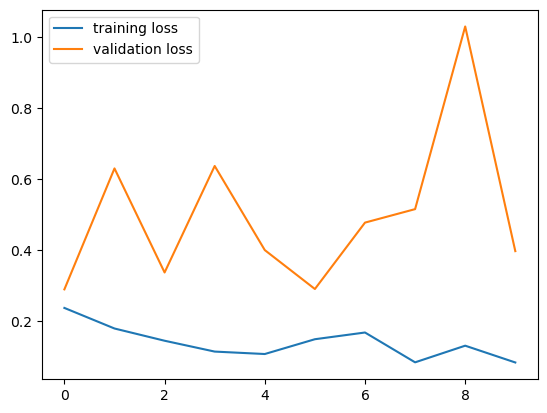

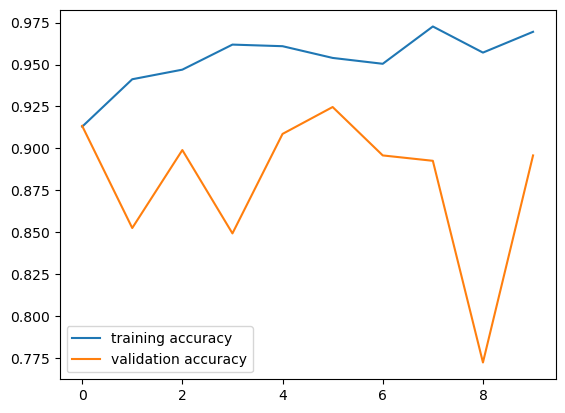

<Figure size 640x480 with 0 Axes>

In [31]:
plt.plot(fitted_model.history['loss'], label='training loss') #Plotting the accuracies
plt.plot(fitted_model.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(fitted_model.history['accuracy'], label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
evaluation =final_model.evaluate(training_set)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = final_model.evaluate(test_set)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


315/315 [==============================] - 898s 3s/step - loss: 0.9663 - accuracy: 0.4285
Train Accuracy: 42.85%
63/63 [==============================] - 181s 3s/step - loss: 1.0819 - accuracy: 0.3750
Test Accuracy: 37.50%


In [54]:
#save Final model
final_model.save(r'C:\Users\Asus\Final_model.h5')

In [ ]:
# Code for testing 

1/1 [==============================] - 1s 1s/step
Person is safe.
Predictions: [[1. 0.]]

 

(250, 250)
<class 'PIL.Image.Image'>
RGB


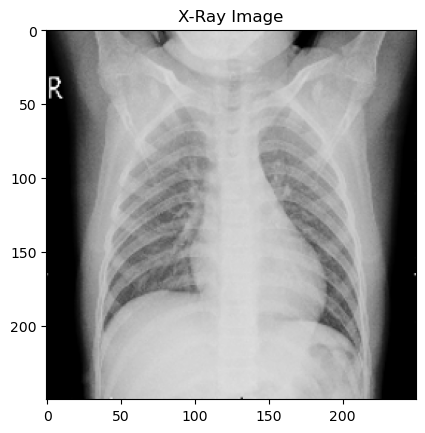

In [1]:
from keras_preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
import cv2

model=load_model(r'C:\Users\Asus\Final_model.h5') #Loading our model
img=image.load_img(r"C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\val\NORMAL\NORMAL2-IM-1427-0001.jpeg",target_size=(224,224))


imagee=image.img_to_array(img) #Converting the X-Ray into pixels
imagee=np.expand_dims(imagee, axis=0)
img_data=preprocess_input(imagee)
prediction=model.predict(img_data)
if prediction[0][0]>prediction[0][1]:  #Printing the prediction of model.
    print('Person is safe.')
else:
    print('Person is affected with Bronchitis.')
print(f'Predictions: {prediction}')
print("\n \n")

# change image size
xray= img.resize([250, 250])
print(xray.size)
# find more about the image
print(type(xray))
print(xray.mode)
# show the image
plt.title("X-Ray Image")
plt.imshow(xray)